In [78]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [81]:
fig_dir = Path('/cellar/users/dlaub/projects/log_euclidean_signature/dsc291-final-project/figures')

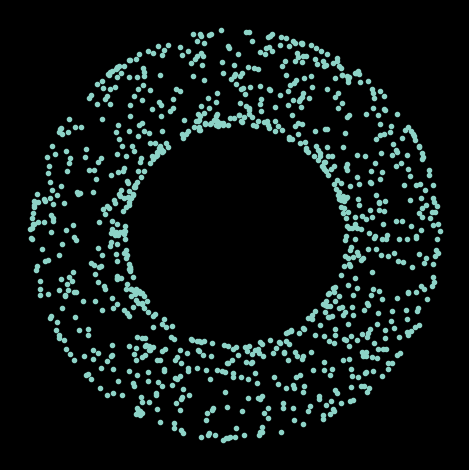

In [82]:
N = 1000  # Number of samples - reduced from N=3000 for faster computation times
ITER_NUM = 2  # Number of trials to average on
R1 = 10  # Major radius
R2 = 3  # Minor/middle radius in 2D/3D
R3 = 1  # Minor radius in 3D
NOISE_VAR = 0.01  # STD of added noise to the tori data
R_RATIOS = np.arange(0.4, 1.01, 0.2)  # Radius ratio (c parameter)
DICT_KEYS = ['t2D_2DSc', 't2D_3D', 't2D_3DSc', 't3D_2DSc', 't3D_3DSc']

def tori_2d_gen(c):
    ang1, ang2, ang3 = 2 * np.pi * np.random.rand(N), 2 * np.pi * np.random.rand(N), 2 * np.pi * np.random.rand(N)
    tor2d = np.concatenate(([(R1 + c * R2 * np.cos(ang2)) * np.cos(ang1)],
                            [(R1 + c * R2 * np.cos(ang2)) * np.sin(ang1)],
                            [c * R2 * np.sin(ang2)]),
                           axis=0)
    tor2d += NOISE_VAR * np.random.randn(3, N)
    return tor2d

tori_2d = tori_2d_gen(1)

plt.style.use('dark_background')

fig, ax = plt.subplots()
ax.plot(tori_2d[0], tori_2d[1], '.')
ax.set_box_aspect(1)
ax.axis('off')
fig.tight_layout()
fig.savefig(fig_dir/'2d_tori.png', dpi=300);

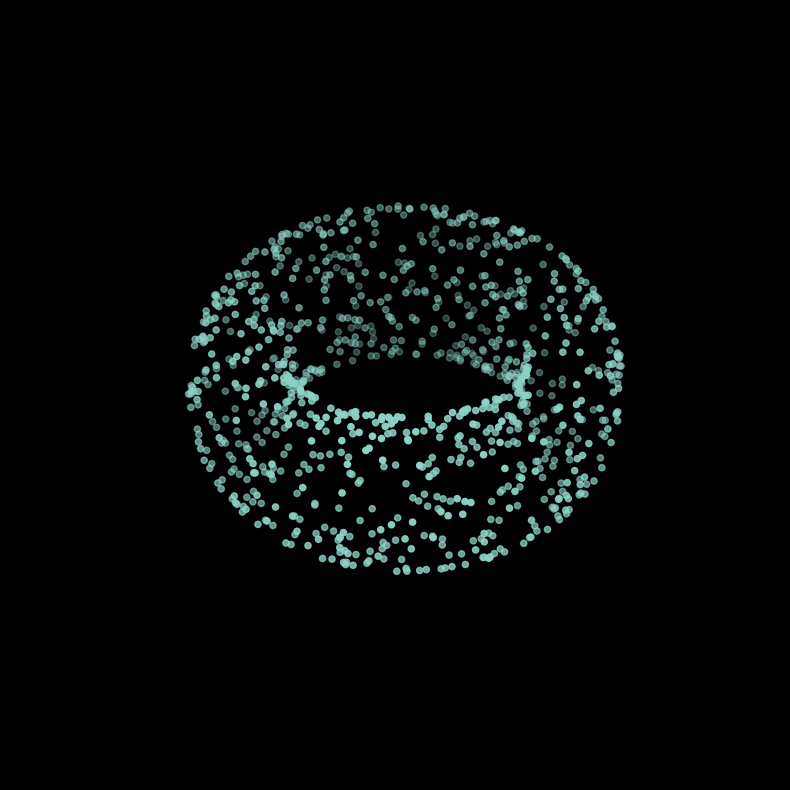

In [83]:
plt.figure(figsize=(8, 8))
ax = plt.subplot(projection='3d')
ax.scatter(tori_2d[0], tori_2d[1], tori_2d[2], '.')
ax.set(zlim=[-6, 6])
ax.view_init(-140, 45)
ax.axis('off')
plt.tight_layout()
plt.savefig(fig_dir/'3d_tori.png', dpi=300);